In [31]:
import glob
import json
import numpy as np

dir = "../res"
json_files = glob.glob(f"{dir}/*.json")

In [32]:
def extract_psnr(file_name):
    with open(file_name, "r") as f:
        data = f.readlines()
    ret = []
    ret_step = []
    for line in data:
        if "psnr" in line:
            stat = json.loads(line)
            ret.append(stat["psnr"])
            ret_step.append(stat["step"])
    return np.array(ret), np.array(ret_step)

../res/251.json: 27.3546142578125 at step 27999
../res/67.json: 27.583616256713867 at step 17999
../res/263.json: 27.40787696838379 at step 25999
../res/83.json: 27.80030059814453 at step 23999
../res/173.json: 27.490116119384766 at step 25999
../res/229.json: 27.796295166015625 at step 27999
../res/163.json: 27.854475021362305 at step 29999
../res/109.json: 27.738529205322266 at step 27999
../res/5.json: 28.249082565307617 at step 27999
../res/269.json: 28.15526580810547 at step 19999
../res/137.json: 27.952707290649414 at step 21999
../res/233.json: 27.790903091430664 at step 25999
../res/13.json: 27.76120376586914 at step 21999
../res/19.json: 27.74229621887207 at step 29999
../res/197.json: 27.7427921295166 at step 25999
../res/227.json: 27.941335678100586 at step 19999
../res/241.json: 28.097248077392578 at step 29999
../res/79.json: 27.342845916748047 at step 29999
../res/103.json: 28.57079315185547 at step 25999
../res/211.json: 27.492900848388672 at step 27999
../res/107.json: 

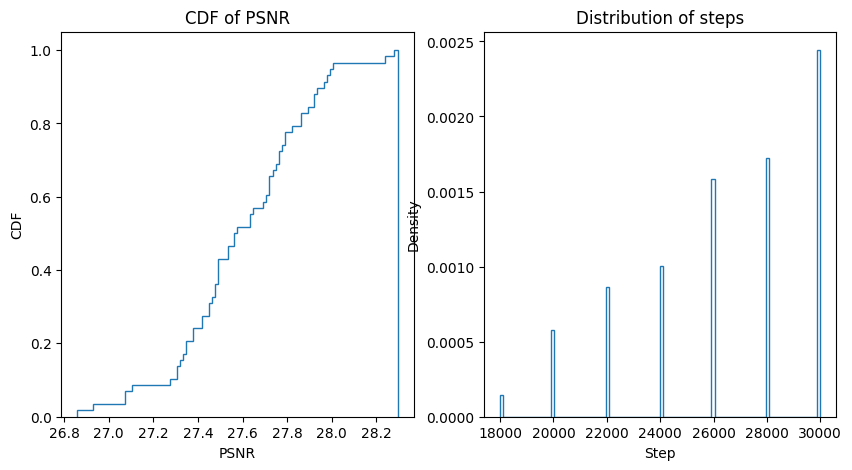

mean: 27.600424766540527, var: 0.2941288312426239


In [33]:
all_psnr = []
all_maxstep = []
for f in json_files:
    psnr, step = extract_psnr(f)
    all_psnr.append(psnr[-2])
    all_maxstep.append(step[psnr.argmax()])
    print(f"{f}: {psnr.max()} at step {step[psnr.argmax()]}")

import matplotlib.pyplot as plt
all_psnr = np.array(all_psnr)
all_maxstep = np.array(all_maxstep)
# two figures: left psnr's CDF, right steps' distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(all_psnr, bins=100, density=True, cumulative=True, histtype='step')
ax[0].set_title("CDF of PSNR")
ax[0].set_xlabel("PSNR")
ax[0].set_ylabel("CDF")
ax[1].hist(all_maxstep, bins=100, density=True, histtype='step')
ax[1].set_title("Distribution of steps")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Density")
plt.show()


mean_psnr = all_psnr.mean()
vars_psnr = all_psnr.std()
print(f"mean: {mean_psnr}, var: {vars_psnr}")


